In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names # 컬럼 이름

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
data=pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = boston.target

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

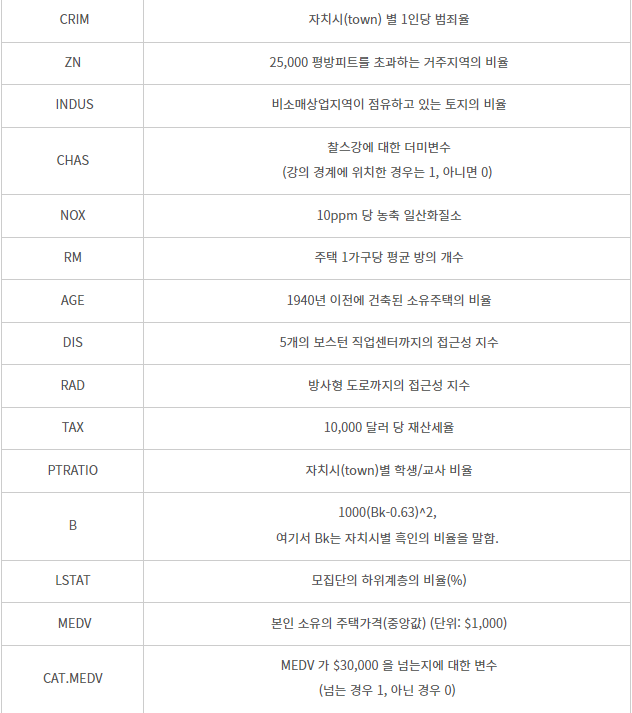

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Train, Test로 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


#### LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
l_model = LinearRegression()

In [14]:
l_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 평가
l_model.score(X_test, y_test) # R square : 적합한 정도

0.7836295385076281

In [16]:
print(l_model.coef_) #가중치 == 컬럼의 개수 = 특성의 개수

[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


In [17]:
print(l_model.intercept_) # 절편

46.396493871823864


#### 특성확장

In [18]:
ex_X_train = X_train.copy()

In [19]:
for i in ex_X_train.columns:
    print(i)

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


In [20]:
for j in X_train.columns: # 총 몇번이 반복되는걸까?
    for i in X_train.columns:
        ex_X_train[j+ '*'+i]=X_train[j]*X_train[i]

C:\Users\smhrd\AppData\Local\Temp/ipykernel_6208/2765962757.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ex_X_train[j+ '*'+i]=X_train[j]*X_train[i]


In [21]:
ex_X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT*CHAS,LSTAT*NOX,LSTAT*RM,LSTAT*AGE,LSTAT*DIS,LSTAT*RAD,LSTAT*TAX,LSTAT*PTRATIO,LSTAT*B,LSTAT*LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,...,0.0,4.44388,49.13874,510.468,38.883950,33.04,2535.82,173.460,3278.3940,68.2276
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,...,0.0,6.54132,86.14904,1348.696,98.459140,115.52,4100.96,284.468,5459.4752,208.5136
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,...,0.0,14.25204,144.30456,2098.512,28.843920,509.76,14145.84,429.048,8430.1560,451.1376
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,...,0.0,1.84896,28.49040,94.176,23.332752,12.96,1088.64,79.056,1709.1216,18.6624
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,...,0.0,5.11216,25.35432,625.848,11.485984,170.88,4741.92,143.824,2525.4640,50.6944


In [22]:
ex_X_train.shape

(354, 182)

In [23]:
ex_X_test = X_test.copy()
for j in X_test.columns: # 총 몇번이 반복되는걸까?
    for i in X_test.columns:
        ex_X_test[j+ '*'+i]=X_test[j]*X_test[i]

C:\Users\smhrd\AppData\Local\Temp/ipykernel_6208/2004598971.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ex_X_test[j+ '*'+i]=X_test[j]*X_test[i]


In [24]:
l_model.fit(ex_X_train, y_train)

LinearRegression()

In [25]:
l_model.score(ex_X_test, y_test)

0.8043803930997194

#### Ridge

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge_model = Ridge()

In [28]:
ridge_model.fit(ex_X_train,y_train)

Ridge()

In [30]:
ridge_model.score(ex_X_test, y_test)

0.8239994029608095

#### Ridge vs Lasso

In [32]:
from sklearn.linear_model import Lasso

In [33]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]

r_coef_list = []
l_coef_list = []

for a in alpha_list:
    ridge_model = Ridge(alpha = a)
    lasso_model = Lasso(alpha = a)
    
    ridge_model.fit(ex_X_train, y_train)
    lasso_model.fit(ex_X_train, y_train)
    
    r_coef_list.append(ridge_model.coef_)
    l_coef_list.append(lasso_model.coef_)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57206e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1211.1689722450355, tolerance: 2.8740928389830507
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1391.0544800246391, tolerance: 2.8740928389830507
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

In [34]:
len(r_coef_list)

6

In [35]:
len(l_coef_list)

6

In [36]:
r_coef_list[0]

array([-2.96794630e+00,  4.40672170e-01, -4.97153974e+00,  3.77907262e+01,
        4.27237399e+01,  2.25141743e+01,  1.11012131e+00, -9.64573443e+00,
       -5.11285201e-01,  1.16692308e-01,  3.30379822e+00,  7.53175537e-02,
        9.39215885e-01,  5.63109559e-03,  5.88188889e-02,  7.24854574e-02,
        1.17493416e+00, -9.79293999e-01,  1.56968757e-01, -4.50205423e-03,
       -3.86814493e-02,  3.63637187e-02, -5.89593737e-03,  1.44195050e-01,
       -1.92417332e-05,  1.40067793e-02,  5.88188947e-02, -4.30502053e-04,
       -2.49369771e-03, -7.27163725e-02, -8.04039192e-01,  8.45322452e-03,
        3.48635761e-04, -1.01194594e-02,  6.68477995e-04,  2.99119055e-04,
        3.59404610e-03,  5.81894142e-05, -3.02804457e-03,  7.24852837e-02,
       -2.49369365e-03,  3.05929929e-02, -1.46580283e-01,  1.22890099e+00,
        1.05272463e-01,  1.96096703e-03,  8.38414735e-02, -1.71587818e-02,
        7.03460060e-04,  1.40663695e-02,  4.94887238e-04, -8.43058188e-03,
        1.17493416e+00, -

In [37]:
np.array(r_coef_list).T

array([[-2.96794630e+00, -3.08402924e+00, -2.66183560e+00,
        -7.58614558e-02, -4.69519862e-03,  5.03515499e-04],
       [ 4.40672170e-01,  4.14180274e-01,  3.14357236e-01,
        -1.94213584e-01, -1.58360549e-01, -3.51651553e-02],
       [-4.97153974e+00, -4.57650497e+00, -3.89382208e+00,
        -2.30468891e-01,  7.06458471e-03,  4.05760366e-03],
       ...,
       [ 1.99503045e-02,  2.00615720e-02,  2.18769040e-02,
         1.67186938e-02,  1.25866800e-02,  5.45238842e-03],
       [-2.97037748e-04, -3.07551499e-04, -3.21996441e-04,
        -3.15266587e-04, -2.92371892e-04, -8.52131381e-05],
       [ 1.55269922e-02,  1.53796284e-02,  1.53795007e-02,
         2.08191307e-02,  2.52359035e-02,  3.15149329e-02]])

In [38]:
np.array(r_coef_list).T.shape

(182, 6)

In [39]:
rid_df = pd.DataFrame(np.array(r_coef_list).T, columns = alpha_list)

In [41]:
rid_df.head()

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-2.967946,-3.084029,-2.661836,-0.075861,-0.004695,0.000504
1,0.440672,0.414180,0.314357,-0.194214,-0.158361,-0.035165
2,-4.971540,-4.576505,-3.893822,-0.230469,0.007065,0.004058
3,37.790726,27.202270,7.193797,0.101728,0.005391,0.000041
4,42.723740,6.367370,0.419346,0.029559,0.005779,0.000777


In [42]:
lass_df = pd.DataFrame(np.array(l_coef_list).T, columns = alpha_list)

In [43]:
lass_df.head()

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-1.049528,-0.868957,0.000000,0.0,-0.0,-0.0
1,-0.188179,-0.173675,-0.042225,-0.0,0.0,0.0
2,0.458929,0.226905,0.000000,-0.0,-0.0,-0.0
3,26.852555,0.000000,0.000000,0.0,0.0,0.0
4,-0.000000,0.000000,0.000000,-0.0,-0.0,-0.0


In [58]:
def plot(coef, alpha):
    plt.figure(figsize = (6,3))
    plt.ylim([-13,5])
    plt.bar(ex_X_train.columns, coef)
    plt.title('alpha={}'.format(alpha))
    plt.show()

In [54]:
import matplotlib.pyplot as plt

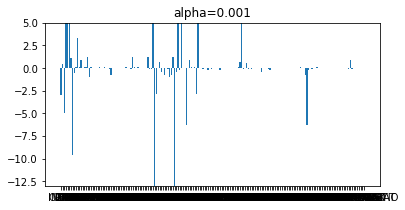

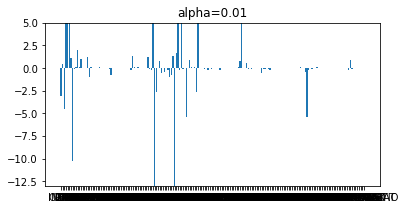

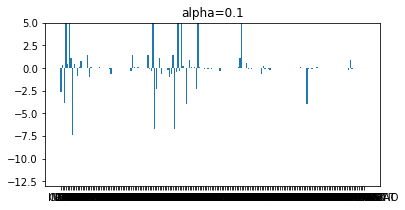

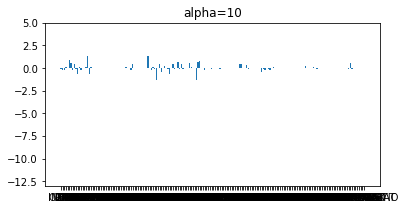

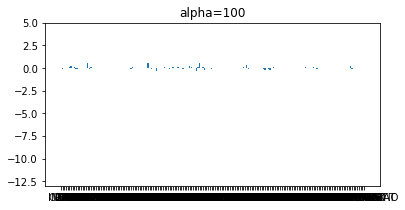

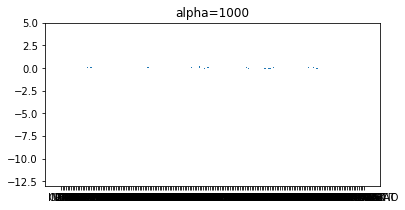

In [59]:
cnt = 0
for i in alpha_list:
    plot(r_coef_list[cnt], i)
    cnt += 1